# Phase 1 Project: Aviation Risk Analysis for Aircraft Procurement

## 1. Business Understanding

### 1.1 Project Overview and Real-World Problem

Our company is embarking on an exciting new strategic initiative: diversifying its portfolio by entering the aviation industry. Specifically, we are exploring the acquisition and operation of aircraft for both commercial and private enterprises. This represents a significant investment and a venture into an unfamiliar domain for our organization.

**The real-world problem** we face is a critical lack of knowledge regarding the inherent risks associated with various aircraft types. Without a data-driven understanding of past incidents and safety performance, making informed procurement decisions for this new business endeavor is fraught with uncertainty and potential financial or safety liab
lities.

### 1.2 Stakeholders and Project Value

This analysis is directly aimed at providing tangible value to a key stakeholder: **the Head of the New Aviation DStakeholder and how They Benefit                                       Aviation Regulators (FAA, KCAA, etc.): Use trend analysis to guide safety regulations and audits.

Airlines and Pilots: Understand risk patterns to adjust training and flight protocols.

Aircraft Manufacturers: Identify models with higher accident rates for redesigns.

Insurance Companies: Use severity patterns to assess risk more accurately.

Air Accident Investigators: Detect common causes for root cause analysis and policy change.

Academic Researchers: Build on the insights for further aviation safety studies.or the new fleet.

### 1.3 Project Objective

The primary objective of this project is to analyze a comprehensive dataset of civil aviation accidents to:
* Quantify and compare risk across different aircraft categories, makes, and models.
* Extract actionable insights regarding the safety performance of various aircraft.
* Deliver concrete business recommendations on which aircraft types represent the lowest risk, enabling the Head of the Aviation Division to make data-driven purchasing decisions.

### 1.4 Defining "Lowest Risk" for this Analysis

For the purpose of this project, 'lowest risk' will be primarily assessed through a combination of key safety metrics derived from accident data. This includes:
* **Fatal Accident Rate:** The percentage of accidents for a given aircraft make/model that resulted in at least one fatality. This provides a direct measure of human life risk.
* **Average Fatalities per Accident:** The mean number of fatalities across all accidents for a specific aircraft type, offering insight into the potential human cost per incident.
* **Aircraft Damage Severity Rate:** The proportion of accidents resulting in 'Substantial' or 'Destroyed' aircraft damage, indicating the financi
  al### 1.5 Conclusion: Implications for Real-World Use
The findings from this analysis can be directly applied to improve aviation safety standards, reduce accident severity, and ultimately save lives. By identifying high-risk conditions and aircraft models, stakeholders can proactively implement changes in policy, manufacturing, and pilot training. Furthermore, these insights enable data-driven decision-making across the aviation industry, from policy formation to real-time risk assessments.olistic view of their safety performance.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Shows the code for loading the AviationData.csv file, including encoding and low_memory.
df = pd.read_csv("AviationData.csv",encoding='ISO-8859-1',low_memory=False)


In [33]:
#printing the first 5 columns of the dataset 
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [34]:
# prints every column and the data type of data in the column
df.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

In [35]:
# Crucial for understanding data types and non-null counts. Discuss initial observations 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

### Data Understanding
#### This Provides an overview of the dataset, its structure, and initial data quality observations.
##### 1.1 Data Source: The National Transportation Safety Board (NTSB) data.


### Data Source and Suitability
The dataset, AviationData.csv, is sourced from the National Transportation Safety Board (NTSB). The NTSB is an independent U.S. government investigative agency responsible for civil transportation accident investigation. This makes the data highly reliable and authoritative for aviation safety analysis.

##### Suitability for the project: This dataset is highly suitable for our project for the following reasons:

 Comprehensive Accident Records: It contains detailed records of civil aviation accidents and incidents, including information critical for risk assessment.
 Key Risk Indicators: It includes direct measures of accident severity such as total_fatal_injuries, total_serious_injuries, aircraft_damage, and injury_severity.
Aircraft Identification: Columns like make, model, and aircraft_category allow us to categorize and analyze risk at the aircraft level, which is central to our business problem of purchasing specific aircraft types.
 Contextual Information: Features like purpose_of_flight, phase_of_flight, and weather_condition provide crucial context, enabling a deeper understanding of accident contributing factors and helping to identify operational risks relevant to commercial and private enterprises.
#### Observations:
 The dataset contains a mix of numerical, categorical, and text-based columns. Many columns are currently object type, indicating they are stored as strings.
 There are a significant number of missing values (NaN) in various columns, which will require careful handling.
 Some categorical columns, like aircraft_category and purpose_of_flight, show clear categories but might have inconsistencies or 'Unknown' entries.



In [36]:
# Check for missing values across all columns
print(df.isnull().sum().sort_values(ascending=False))

Schedule                  76307
Air.carrier               72241
FAR.Description           56866
Aircraft.Category         56602
Longitude                 54516
Latitude                  54507
Airport.Code              38757
Airport.Name              36185
Broad.phase.of.flight     27165
Publication.Date          13771
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Fatal.Injuries      11401
Engine.Type                7096
Report.Status              6384
Purpose.of.flight          6192
Number.of.Engines          6084
Total.Uninjured            5912
Weather.Condition          4492
Aircraft.damage            3194
Registration.Number        1382
Injury.Severity            1000
Country                     226
Amateur.Built               102
Model                        92
Make                         63
Location                     52
Investigation.Type            0
Event.Date                    0
Accident.Number               0
Event.Id                      0
dtype: i

In [37]:
# Check the number of unique values per column (cardinality)
print(df.nunique().sort_values(ascending=False))

Accident.Number           88863
Event.Id                  87951
Registration.Number       79104
Location                  27758
Longitude                 27154
Latitude                  25589
Airport.Name              24870
Report.Status             17074
Event.Date                14782
Air.carrier               13590
Model                     12318
Airport.Code              10374
Make                       8237
Publication.Date           2924
Total.Uninjured             379
Country                     219
Total.Fatal.Injuries        125
Injury.Severity             109
Total.Minor.Injuries         57
Total.Serious.Injuries       50
FAR.Description              31
Purpose.of.flight            26
Aircraft.Category            15
Engine.Type                  12
Broad.phase.of.flight        12
Number.of.Engines             7
Weather.Condition             4
Aircraft.damage               4
Schedule                      3
Amateur.Built                 2
Investigation.Type            2
dtype: i

In [38]:
# Show the number of rows and columns.
df.shape

(88889, 31)

In [39]:
# Displays the column names we have in our DataSet 
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [40]:
# Missing Values Overview: Use df.isnull().sum() to show the count of missing values per column.
df.isnull().sum() 

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

In [41]:
# Count unique values for all columns.
df.nunique()

Event.Id                  87951
Investigation.Type            2
Accident.Number           88863
Event.Date                14782
Location                  27758
Country                     219
Latitude                  25589
Longitude                 27154
Airport.Code              10374
Airport.Name              24870
Injury.Severity             109
Aircraft.damage               4
Aircraft.Category            15
Registration.Number       79104
Make                       8237
Model                     12318
Amateur.Built                 2
Number.of.Engines             7
Engine.Type                  12
FAR.Description              31
Schedule                      3
Purpose.of.flight            26
Air.carrier               13590
Total.Fatal.Injuries        125
Total.Serious.Injuries       50
Total.Minor.Injuries         57
Total.Uninjured             379
Weather.Condition             4
Broad.phase.of.flight        12
Report.Status             17074
Publication.Date           2924
dtype: i

## Data Preparation
##### This section details all the transformations applied to clean and prepare your data for analysis. Justify each major step.
###### Transform the raw data into a clean, consistent, and analysis-ready format.


In [42]:
# Define useful columns based on business needs and for my analysis
columns_to_keep = [
    'Event.Date', 'Location', 'Aircraft.Category', 'Make', 'Model', 'Location', 'Country',
    'Injury.Severity','Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
    'Total.Minor.Injuries', 'Total.Uninjured', 'Aircraft.damage', 'Weather.Condition'
]

In [43]:
# Filter dataframe to keep only relevant columns
df = df[columns_to_keep]

# Show resulting dataframe structure
df.head(88888)

,Event.Date,Location,Aircraft.Category,Make,Model,Location,Country,Injury.Severity,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Aircraft.damage,Weather.Condition
0,1948-10-24,"MOOSE CREEK, ID",NaN,Stinson,108-3,"MOOSE CREEK, ID",United States,Fatal(2),Personal,2.0,0.0,0.0,0.0,Destroyed,UNK
1,1962-07-19,"BRIDGEPORT, CA",NaN,Piper,PA24-180,"BRIDGEPORT, CA",United States,Fatal(4),Personal,4.0,0.0,0.0,0.0,Destroyed,UNK
2,1974-08-30,"Saltville, VA",NaN,Cessna,172M,"Saltville, VA",United States,Fatal(3),Personal,3.0,NaN,NaN,NaN,Destroyed,IMC
3,1977-06-19,"EUREKA, CA",NaN,Rockwell,112,"EUREKA, CA",United States,Fatal(2),Personal,2.0,0.0,0.0,0.0,Destroyed,IMC
4,1979-08-02,"Canton, OH",NaN,Cessna,501,"Canton, OH",United States,Fatal(1),Personal,1.0,2.0,NaN,0.0,Destroyed,VMC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88883,2022-12-22,"Brasnorte,",NaN,AIR TRACTOR,AT502,"Brasnorte,",Brazil,Fatal,NaN,1.0,0.0,0.0,0.0,NaN,NaN
88884,2022-12-26,"Annapolis, MD",NaN,PIPER,PA-28-151,"Annapolis, MD",United States,Minor,Personal,0.0,1.0,0.0,0.0,NaN,NaN
88885,2022-12-26,"Hampton, NH",NaN,BELLANCA,7ECA,"Hampton, NH",United States,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN
88886,2022-12-26,"Payson, AZ",Airplane,AMERICAN CHAMPION AIRCRAFT,8GCBC,"Payson, AZ",United States,Non-Fatal,Personal,0.0,0.0,0.0,1.0,Substantial,VMC


In [44]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [62]:
# Convert column names to lowercase
df.columns = [col.lower() for col in df.columns]

# Standardize all string values in the DataFrame
for col in df.columns:
    if df[col].dtype == object or df[col].dtype.name == 'string':
        df[col] = df[col].astype(str).str.strip()
        df[col] = df[col].apply(
            lambda x: x.upper() if x.isupper() else x.title()
        )



In [63]:
# Ensure event.date is converted to datetime format
df['event.date'] = pd.to_datetime(df['event.date'], errors='coerce')  

# Create total injuries column
df['total.injuries'] = (
    df['total.fatal.injuries'] +
    df['total.serious.injuries'] +
    df['total.minor.injuries']
)

In [64]:
# Create a flag for fatal accidents
df['is.fatal.accident'] = df['total.fatal.injuries'] > 0


In [65]:
# Extract year from event.date 
df['accident.year'] = df['event.date'].dt.year


In [66]:
# Show updated DataFrame with lowercase column names
df[['event.date', 'accident.year', 'total.injuries', 'is.fatal.accident']].head()

,event.date,accident.year,total.injuries,is.fatal.accident
2,1974-08-30,1974,NaN,True
3,1977-06-19,1977,2.0,True
4,1979-08-02,1979,NaN,True
5,1979-09-17,1979,NaN,False
6,1981-08-01,1981,4.0,True


In [67]:
# Convert column names to lowercase
df.columns = [col.lower() for col in df.columns]


In [90]:
# Define the columns you want to keep
columns_to_use = [
    'event.date', 'location', 'make', 'model', 'country',
    'injury.severity', 'purpose.of.flight', 'aircraft.damage',
    'weather.condition', 'total.fatal.injuries', 'total.serious.injuries',
    'total.minor.injuries', 'total.uninjured'
]

# Filter the DataFrame to keep only the selected columns
df = df[columns_to_use]

# Convert numeric columns to numeric type and fill missing with mean
numeric_cols = [
    'total.fatal.injuries', 'total.serious.injuries',
    'total.minor.injuries', 'total.uninjured'
]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Ensure numeric
    df[col].fillna(df[col].mean(), inplace=True)

# Handle missing values in categorical columns by filling with mode
categorical_cols = [
    'event.date', 'location', 'make', 'model',
    'country', 'injury.severity', 'purpose.of.flight',
    'aircraft.damage', 'weather.condition'
]

for col in categorical_cols:
    if df[col].isnull().any():
        df[col].fillna(df[col].mode()[0], inplace=True)

# Replace 'UNK' and 'Nan' string values in weather.condition with mode
mode_weather = df['weather.condition'].mode()[0]
df['weather.condition'] = df['weather.condition'].replace(['UNK', 'Nan'], mode_weather)



In [91]:
mode_severity = df['injury.severity'].mode()[0]
df['injury.severity'] = df['injury.severity'].replace('UNK', mode_severity)
df['injury.severity'] = df['injury.severity'].replace('Nan', mode_severity)


In [92]:
mode_purpose = df['purpose.of.flight'].mode()[0]
df['purpose.of.flight'] = df['purpose.of.flight'].replace('UNK', mode_purpose)
df['purpose.of.flight'] = df['purpose.of.flight'].replace('Nan', mode_purpose)


In [93]:
mode_damage = df['aircraft.damage'].mode()[0]
df['aircraft.damage'] = df['aircraft.damage'].replace('UNK', mode_damage)
df['aircraft.damage'] = df['aircraft.damage'].replace('Nan', mode_damage)


In [94]:
# Drop rows where any value is 'UNK' or 'Unk'
df = df[~df.apply(lambda row: row.astype(str).str.upper().eq('UNK')).any(axis=1)]

df.head(99999)


,event.date,location,make,model,country,injury.severity,purpose.of.flight,aircraft.damage,weather.condition,total.fatal.injuries,total.serious.injuries,total.minor.injuries,total.uninjured
2,1974-08-30,"Saltville, Va",Cessna,172M,United States,Fatal(3),Personal,Destroyed,IMC,3.000000,0.279365,0.352864,5.182193
3,1977-06-19,"EUREKA, CA",Rockwell,112,United States,Fatal(2),Personal,Destroyed,IMC,2.000000,0.000000,0.000000,0.000000
4,1979-08-02,"Canton, Oh",Cessna,501,United States,Fatal(1),Personal,Destroyed,VMC,1.000000,2.000000,0.352864,0.000000
5,1979-09-17,"BOSTON, MA",Mcdonnell Douglas,DC9,United States,Non-Fatal,Personal,Substantial,VMC,0.620758,0.279365,1.000000,44.000000
6,1981-08-01,"COTTON, MN",Cessna,180,United States,Fatal(4),Personal,Destroyed,IMC,4.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,2022-12-26,"Annapolis, Md",PIPER,PA-28-151,United States,Minor,Personal,Substantial,VMC,0.000000,1.000000,0.000000,0.000000
88885,2022-12-26,"Hampton, Nh",BELLANCA,7ECA,United States,Non-Fatal,Personal,Substantial,VMC,0.000000,0.000000,0.000000,0.000000
88886,2022-12-26,"Payson, Az",AMERICAN CHAMPION AIRCRAFT,8GCBC,United States,Non-Fatal,Personal,Substantial,VMC,0.000000,0.000000,0.000000,1.000000
88887,2022-12-26,"Morgan, Ut",CESSNA,210N,United States,Non-Fatal,Personal,Substantial,VMC,0.000000,0.000000,0.000000,0.000000


#### Business Relevance:
##### The company is interested in purchasing airplanes for commercial and private use. Filtering ensures our analysis supports real-world decisions based on the business objective.

In [95]:
# Drop duplicate location column if it exists
df = df.loc[:, ~df.columns.duplicated()]  # remove duplicated columns by name


In [96]:
# OR, explicitly drop known duplicate
df = df.drop(columns=['location.1'], errors='ignore')


In [97]:
# Save to CSV the cleaned dataset
df.to_csv('Cleaned_AviationData_Final.csv', index=False)




In [98]:
df.head(99999)

,event.date,location,make,model,country,injury.severity,purpose.of.flight,aircraft.damage,weather.condition,total.fatal.injuries,total.serious.injuries,total.minor.injuries,total.uninjured
2,1974-08-30,"Saltville, Va",Cessna,172M,United States,Fatal(3),Personal,Destroyed,IMC,3.000000,0.279365,0.352864,5.182193
3,1977-06-19,"EUREKA, CA",Rockwell,112,United States,Fatal(2),Personal,Destroyed,IMC,2.000000,0.000000,0.000000,0.000000
4,1979-08-02,"Canton, Oh",Cessna,501,United States,Fatal(1),Personal,Destroyed,VMC,1.000000,2.000000,0.352864,0.000000
5,1979-09-17,"BOSTON, MA",Mcdonnell Douglas,DC9,United States,Non-Fatal,Personal,Substantial,VMC,0.620758,0.279365,1.000000,44.000000
6,1981-08-01,"COTTON, MN",Cessna,180,United States,Fatal(4),Personal,Destroyed,IMC,4.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,2022-12-26,"Annapolis, Md",PIPER,PA-28-151,United States,Minor,Personal,Substantial,VMC,0.000000,1.000000,0.000000,0.000000
88885,2022-12-26,"Hampton, Nh",BELLANCA,7ECA,United States,Non-Fatal,Personal,Substantial,VMC,0.000000,0.000000,0.000000,0.000000
88886,2022-12-26,"Payson, Az",AMERICAN CHAMPION AIRCRAFT,8GCBC,United States,Non-Fatal,Personal,Substantial,VMC,0.000000,0.000000,0.000000,1.000000
88887,2022-12-26,"Morgan, Ut",CESSNA,210N,United States,Non-Fatal,Personal,Substantial,VMC,0.000000,0.000000,0.000000,0.000000


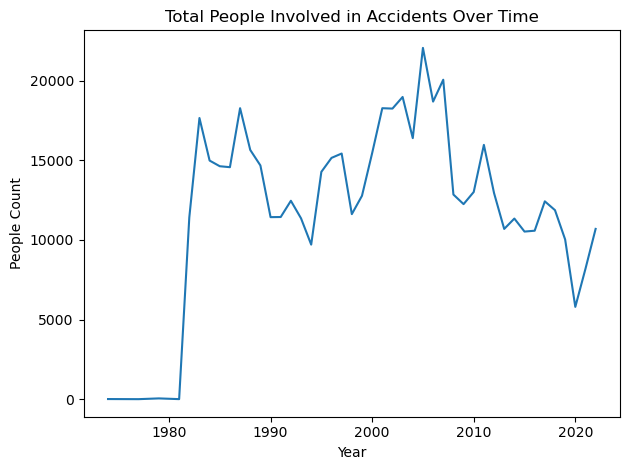

In [103]:
# Ensure 'event.date' is datetime type
df['event.date'] = pd.to_datetime(df['event.date'], errors='coerce')

# Create a new 'accident.year' column
df['accident.year'] = df['event.date'].dt.year

# Create 'total_people' column
df['total_people'] = df[['total.fatal.injuries', 'total.serious.injuries', 
                         'total.minor.injuries', 'total.uninjured']].sum(axis=1)

# Group by year and plot total people involved
df.groupby('accident.year')['total_people'].sum().plot(title='Total People Involved in Accidents Over Time')
plt.xlabel('Year')
plt.ylabel('People Count')
plt.tight_layout()
plt.show()


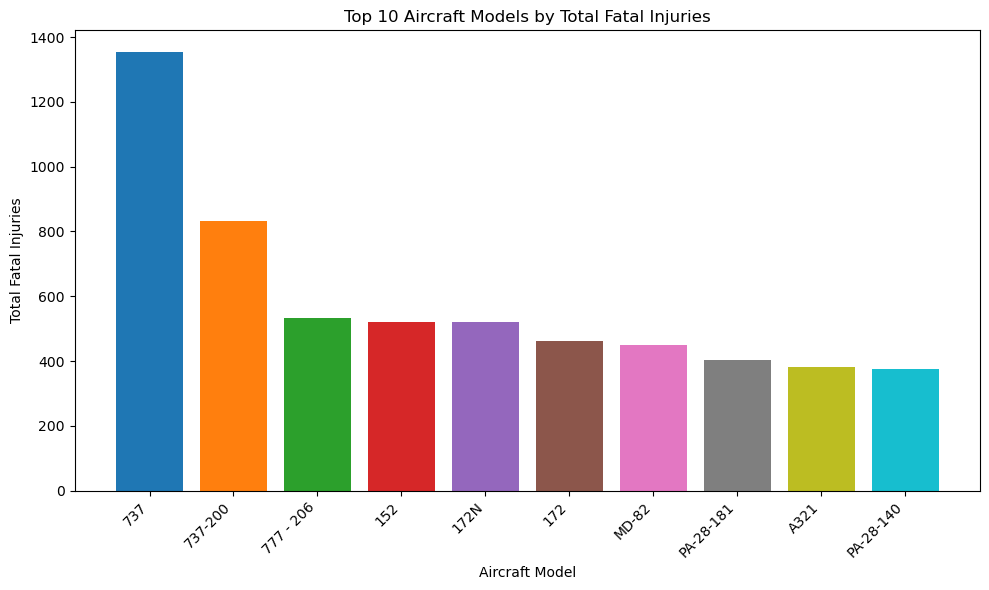

In [83]:
# Group by model and sum the fatal injuries, then take the top 10
top_models = df.groupby('model')['total.fatal.injuries'].sum().sort_values(ascending=False).head(10)

# Create distinct colors for each bar (up to 10 unique colors)
colors = plt.cm.tab10.colors[:len(top_models)]

# Plot with different bar colors
plt.figure(figsize=(10, 6))
plt.bar(top_models.index, top_models.values, color=colors)
plt.title('Top 10 Aircraft Models by Total Fatal Injuries')
plt.xlabel('Aircraft Model')
plt.ylabel('Total Fatal Injuries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



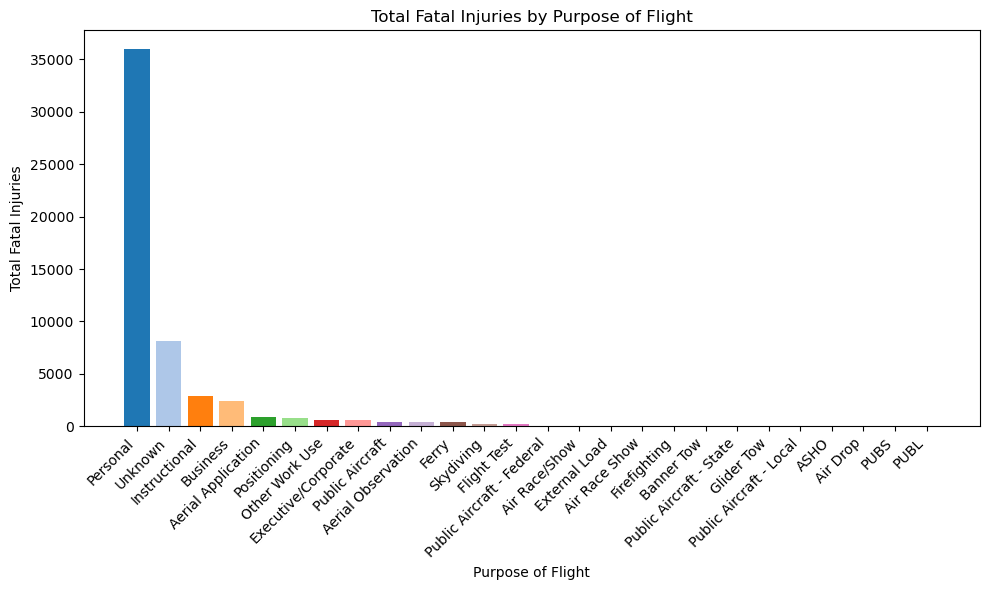

In [84]:
# Group by purpose of flight and sum fatal injuries
fatal_by_purpose = df.groupby('purpose.of.flight')['total.fatal.injuries'].sum().sort_values(ascending=False)

# Create distinct colors for each bar (use tab20 if more than 10 categories)
colors = plt.cm.tab20.colors[:len(fatal_by_purpose)]

# Plot with different bar colors
plt.figure(figsize=(10, 6))
plt.bar(fatal_by_purpose.index, fatal_by_purpose.values, color=colors)
plt.title('Total Fatal Injuries by Purpose of Flight')
plt.xlabel('Purpose of Flight')
plt.ylabel('Total Fatal Injuries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



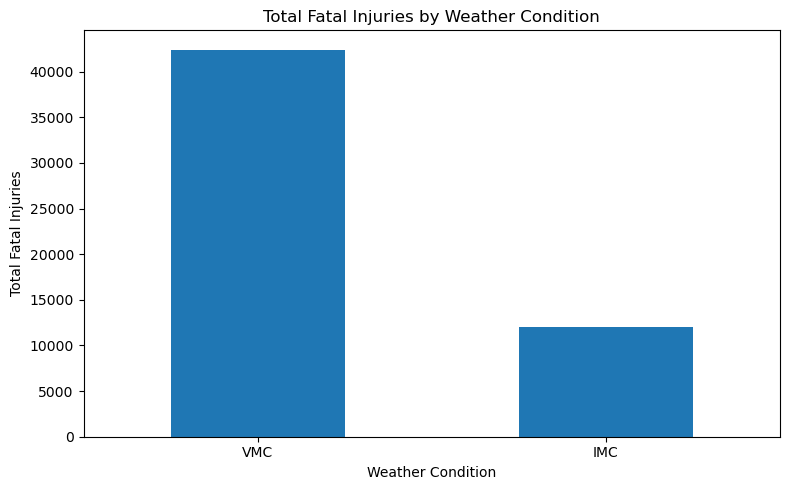

In [111]:
# Group by model and sum the fatal injuries, then take the top 10
top_models = df.groupby('model')['total.fatal.injuries'].sum().sort_values(ascending=False).head(10)

# Create distinct colors for each bar (up to 10 unique colors)
colors = plt.cm.tab10.colors[:len(top_models)]

# Group by weather condition and sum fatal injuries
fatal_by_weather = df.groupby('weather.condition')['total.fatal.injuries'].sum().sort_values(ascending=False)

# Plot
fatal_by_weather.plot(kind='bar', figsize=(8, 5), title='Total Fatal Injuries by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Total Fatal Injuries')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

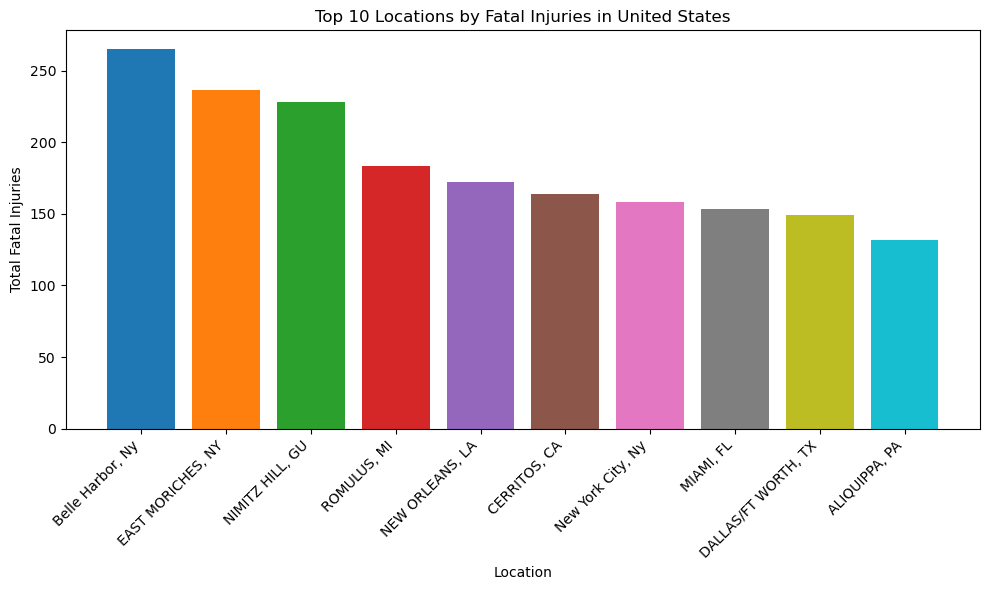

In [86]:
# Filter for a specific country, e.g., United States
country_filter = 'United States'
df_country = df[df['country'] == country_filter]

# Group by location within that country and sum fatal injuries
top_locations_country = df_country.groupby('location')['total.fatal.injuries'].sum().sort_values(ascending=False).head(10)

# Create distinct colors for each bar
colors = plt.cm.tab10.colors[:len(top_locations_country)]  # up to 10 unique colors

# Plot
plt.figure(figsize=(10, 6))
plt.bar(top_locations_country.index, top_locations_country.values, color=colors)
plt.title(f'Top 10 Locations by Fatal Injuries in {country_filter}')
plt.xlabel('Location')
plt.ylabel('Total Fatal Injuries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



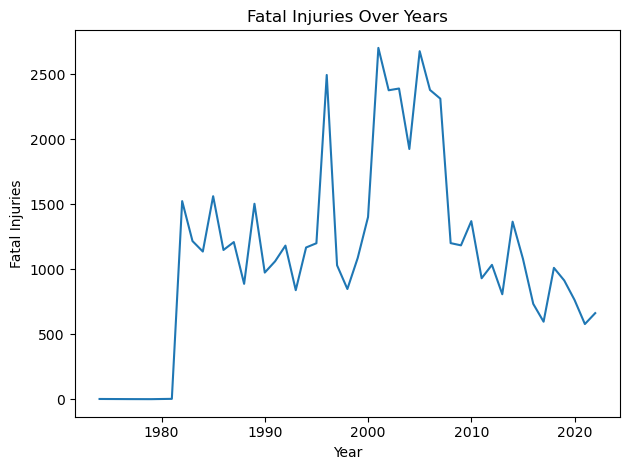

In [123]:
df.groupby('year')['total.fatal.injuries'].sum().plot(kind='line', title='Fatal Injuries Over Years')
plt.xlabel('Year')
plt.ylabel('Fatal Injuries')
plt.tight_layout()
plt.show()


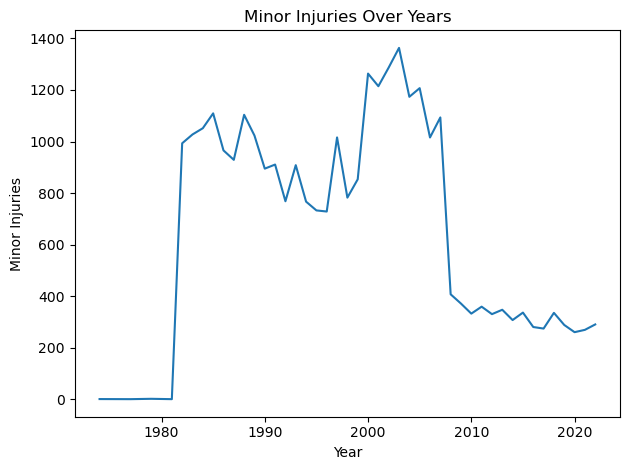

In [124]:
df.groupby('year')['total.minor.injuries'].sum().plot(kind='line', title='Minor Injuries Over Years')
plt.xlabel('Year')
plt.ylabel('Minor Injuries')
plt.tight_layout()
plt.show()


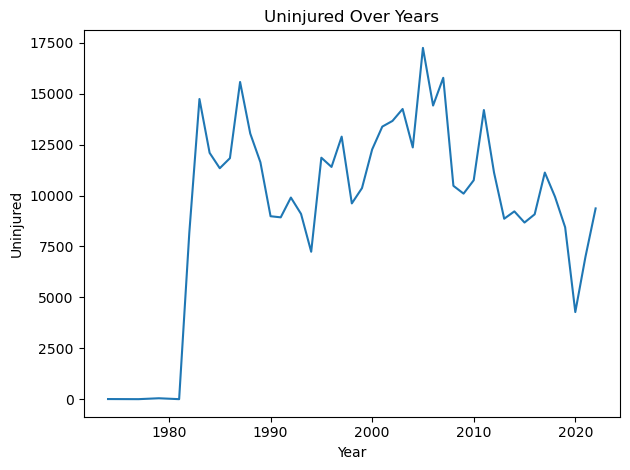

In [122]:
df.groupby('year')['total.uninjured'].sum().plot(kind='line', title='Uninjured Over Years')
plt.xlabel('Year')
plt.ylabel('Uninjured')
plt.tight_layout()
plt.show()


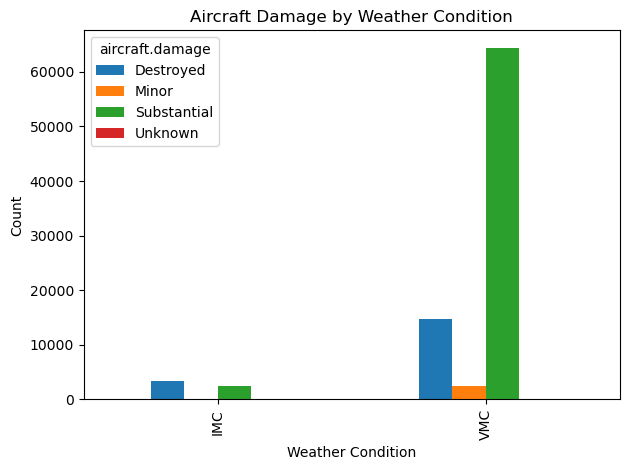

In [112]:
df.groupby('weather.condition')['aircraft.damage'].value_counts().unstack().plot(
    kind='bar',  title='Aircraft Damage by Weather Condition'
)
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


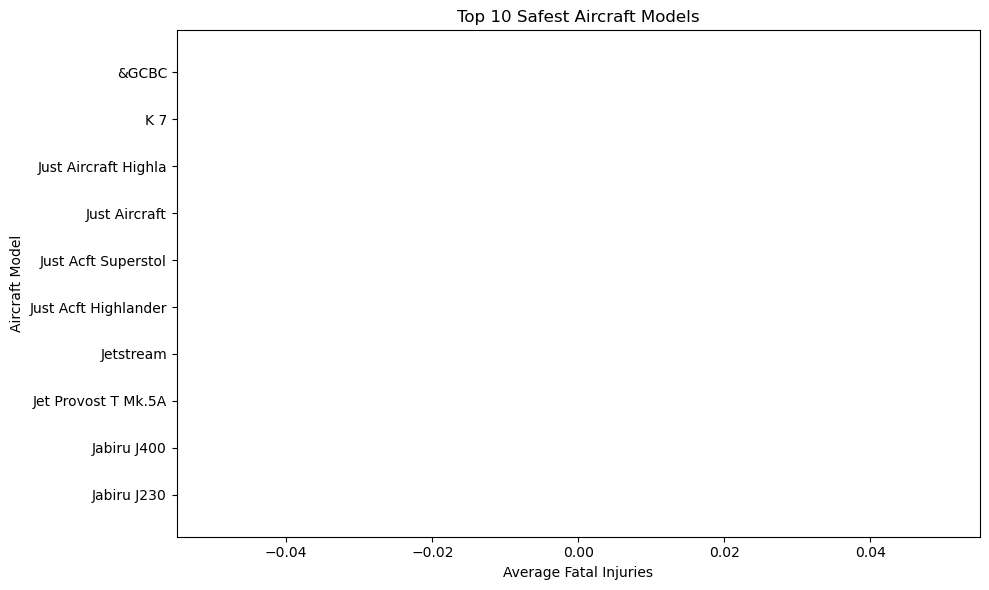

In [113]:
top_models = df.groupby('model')['total.fatal.injuries'].mean().sort_values().head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_models.index, top_models.values, color='green')
plt.title('Top 10 Safest Aircraft Models')
plt.xlabel('Average Fatal Injuries')
plt.ylabel('Aircraft Model')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()


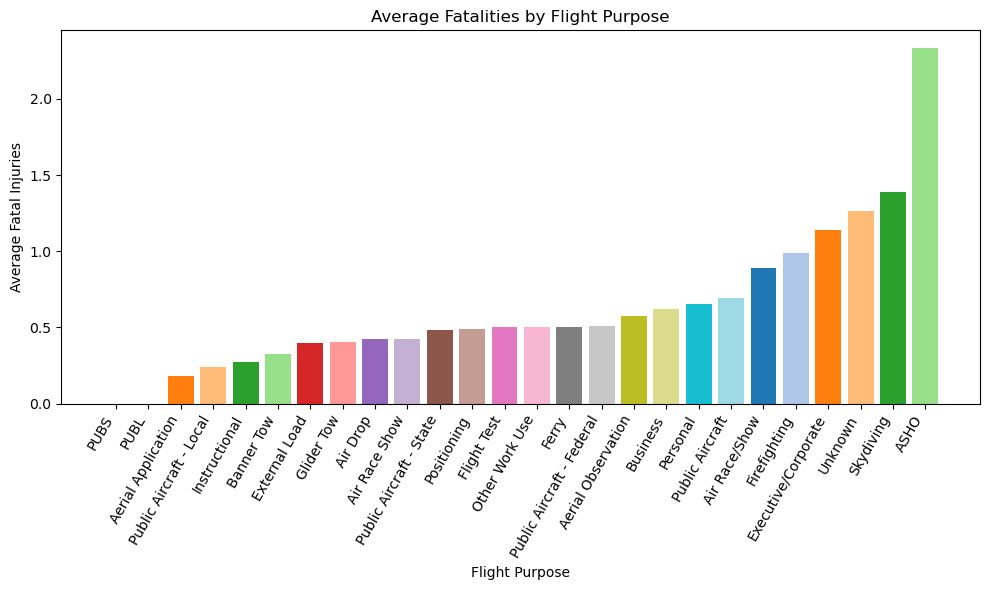

In [114]:
# Group and sort the average fatal injuries by purpose of flight
fatal_by_purpose = df.groupby('purpose.of.flight')['total.fatal.injuries'].mean().sort_values()

# Generate a list of distinct colors for each bar
colors = plt.cm.tab20.colors  # Use tab20 for more category support
color_list = colors[:len(fatal_by_purpose)]  # Adjust to number of bars

# Plot with unique bar colors
plt.figure(figsize=(10, 6))
plt.bar(fatal_by_purpose.index, fatal_by_purpose.values, color=color_list)
plt.title('Average Fatalities by Flight Purpose')
plt.xlabel('Flight Purpose')
plt.ylabel('Average Fatal Injuries')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()



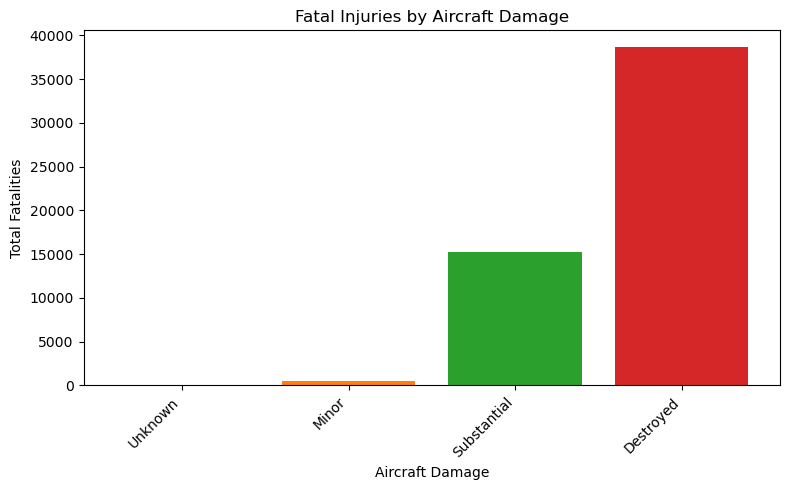

In [115]:
# Group and sort fatal injuries by aircraft damage type
fatal_by_damage = df.groupby('aircraft.damage')['total.fatal.injuries'].sum().sort_values()

# Get a distinct color for each bar
colors = plt.cm.tab10.colors  # tab10 supports up to 10 unique colors
color_list = colors[:len(fatal_by_damage)]  # trim to match number of bars

# Plot bar chart with different colors
plt.figure(figsize=(8, 5))
plt.bar(fatal_by_damage.index, fatal_by_damage.values, color=color_list)
plt.title('Fatal Injuries by Aircraft Damage')
plt.xlabel('Aircraft Damage')
plt.ylabel('Total Fatalities')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



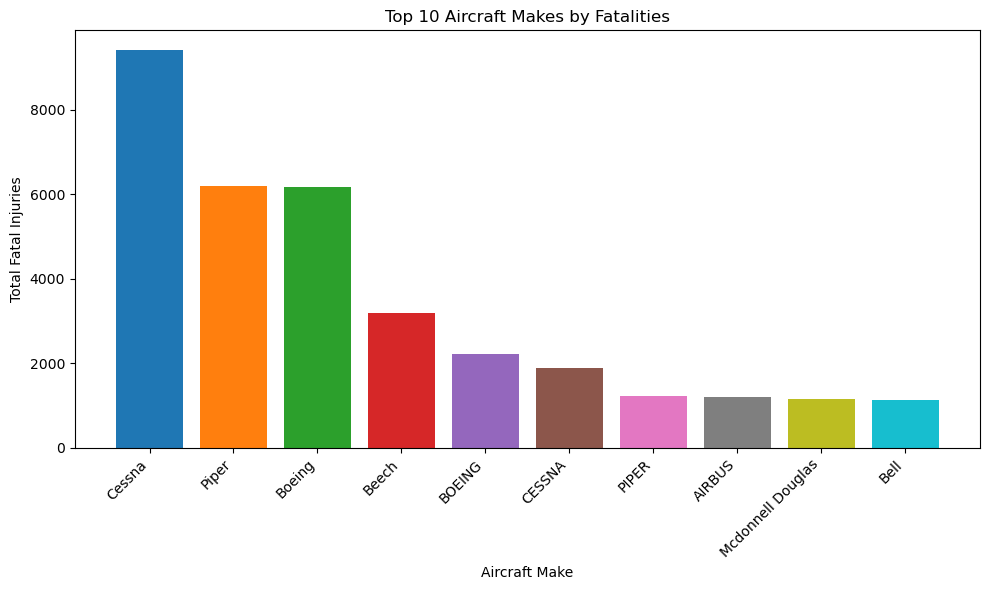

In [116]:
# Get the top 10 aircraft makes by fatal injuries
top_makes = df.groupby('make')['total.fatal.injuries'].sum().sort_values(ascending=False).head(10)

# Use 10 distinct colors from the tab10 colormap
colors = plt.cm.tab10.colors[:10]

# Plot the bar chart with different colors for each bar
plt.figure(figsize=(10, 6))
plt.bar(top_makes.index, top_makes.values, color=colors)
plt.title('Top 10 Aircraft Makes by Fatalities')
plt.xlabel('Aircraft Make')
plt.ylabel('Total Fatal Injuries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



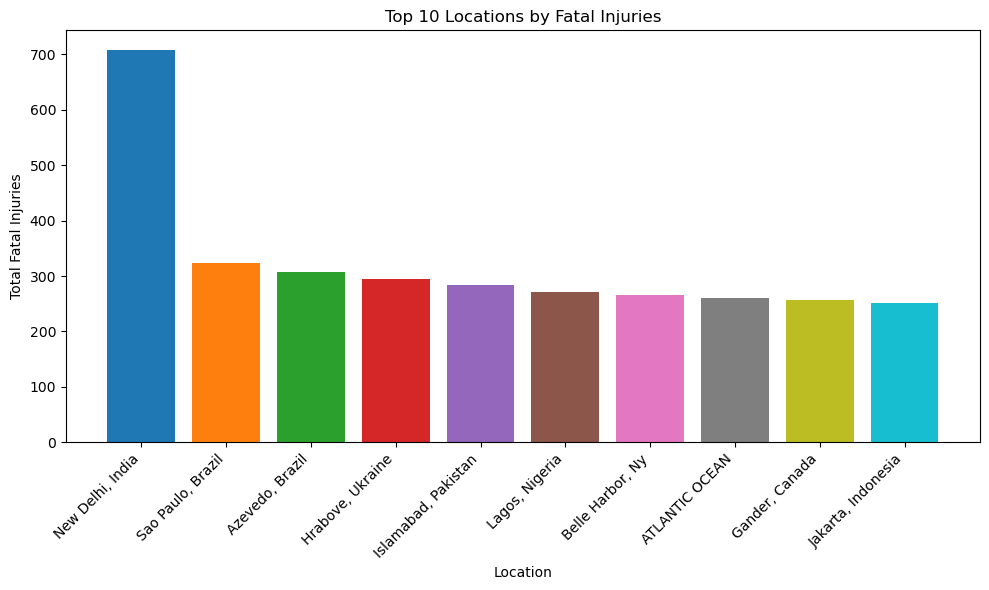

In [117]:
import matplotlib.pyplot as plt

# Get the top 10 locations by fatal injuries
top_locations = df.groupby('location')['total.fatal.injuries'].sum().sort_values(ascending=False).head(10)

# Get 10 distinct colors from the 'tab10' colormap
colors = plt.cm.tab10.colors[:10]

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_locations.index, top_locations.values, color=colors)
plt.title('Top 10 Locations by Fatal Injuries')
plt.xlabel('Location')
plt.ylabel('Total Fatal Injuries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



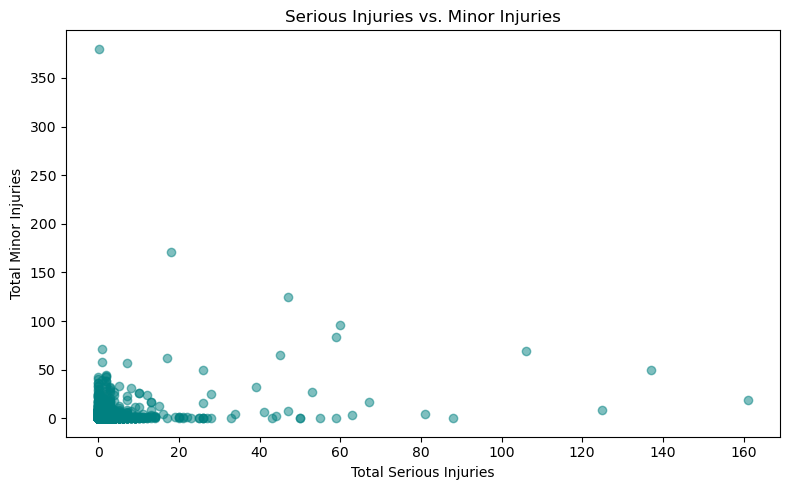

In [118]:
plt.figure(figsize=(8, 5))
plt.scatter(df['total.serious.injuries'], df['total.minor.injuries'], alpha=0.5, color='teal')
plt.title('Serious Injuries vs. Minor Injuries')
plt.xlabel('Total Serious Injuries')
plt.ylabel('Total Minor Injuries')
plt.tight_layout()
plt.show()


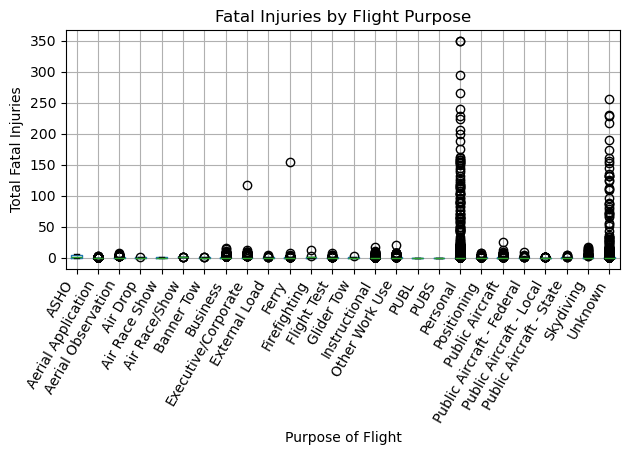

In [121]:
df.boxplot(column='total.fatal.injuries', by='purpose.of.flight')

plt.title('Fatal Injuries by Flight Purpose')
plt.suptitle('')  # Removes default subtitle
plt.xlabel('Purpose of Flight')
plt.ylabel('Total Fatal Injuries')

# Rotate x-axis labels for better fit
plt.xticks(rotation=60, ha='right')

plt.tight_layout()
plt.show()



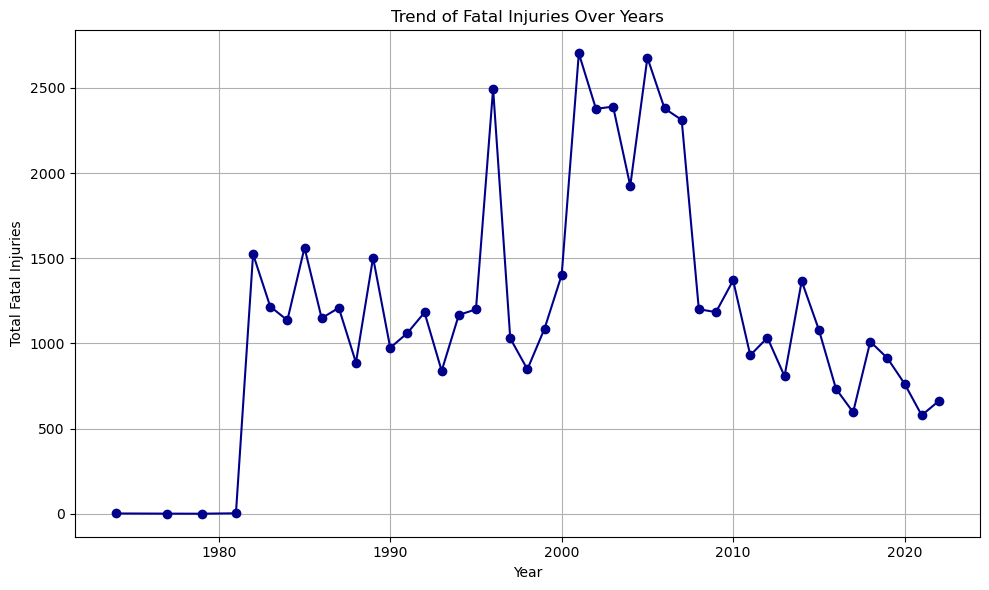

In [120]:
df['event.date'] = pd.to_datetime(df['event.date'], errors='coerce')
df['year'] = df['event.date'].dt.year
fatal_trend = df.groupby('year')['total.fatal.injuries'].sum()

plt.figure(figsize=(10, 6))
plt.plot(fatal_trend.index, fatal_trend.values, marker='o', linestyle='-', color='darkblue')
plt.title('Trend of Fatal Injuries Over Years')
plt.xlabel('Year')
plt.ylabel('Total Fatal Injuries')
plt.grid(True)
plt.tight_layout()
plt.show()
